## Final Project Submission

Please fill out:
* Student name: Doreen Chepkonga
* Student pace: Remote
* Scheduled project review date/time:
* Instructor name: Mark Tiba
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/Aviation_Data.csv')

/var/folders/j0/ftg9k57d045d_5_9xzg5bg9m0000gn/T/ipykernel_1252/1222305295.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/Aviation_Data.csv')


# Data Exploration:

In [3]:
# get an initial look at the format and contents of the data
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# get a feel for the amount of data present and the data types for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

90348 total entires.
    - aircraft category, latitude/longitude, air carrier, ad FAR description have the least complete information
    - latitude/longitude are the only columns that are not a number type when they should be

# Data Cleaning:
    1. Drop columns that are not going to be useful to the data analysis.
    2. Filter out all data not related to airplanes
    3. Drop rows that don't contain a make/model of airplane (0.03% of Make rows, 0.1% of Model rows)

In [5]:
# drop columns that won't be useful to the data analysis

df = data.drop(['Air.carrier', 'Country', 'Airport.Code', 'Schedule', 'Location', 'Accident.Number', 'Amateur.Built', 'Registration.Number', 'Publication.Date'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Latitude                34382 non-null  object 
 4   Longitude               34373 non-null  object 
 5   Airport.Name            52704 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Aircraft.Category       32287 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Number.of.Engines       82805 non-null  float64
 12  Engine.Type             81793 non-null  object 
 13  FAR.Description         32023 non-null  object 
 14  Purpose.of.flight       82697 non-null

In [6]:
# Filter out all data that is not confirmed to be related to airplanes
df = df.groupby('Aircraft.Category').get_group('Airplane')

In [7]:
# remove NaN values from the Make and Model column, since we are recommending which airplanes to invest in
df = df.dropna(axis=0, subset=['Make', 'Model'])


*checking individual columns for incomplete data and opportunities to standardize the format.*

NaN numbers for Injuriy severity, and aircraft damage

    Injury Severity:
        - 812 occurrances
        - there is an "Unavailable: category that all NaN numbers can be wrapped into 
        - The 'Fatal' occurrances also include how many fatalities. 
            - This data is already captured in the "Total Fatal Injuries" column

    Aircraft Damage:
        - 1279 occurances
        - there is an "Unknown" category that all NaN numbers can be wrapped into
    

In [8]:
# df['Aircraft.damage'].value_counts()
# df['Aircraft.damage'].isna().sum()

# df['Injury.Severity'].value_counts()
df['Injury.Severity'].isna().sum()

812

In [9]:
# replace NaN with "Unavailable" in the Injury.Severity column
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unavailable')

# replace NaN with "Unknown" in the Aircraft.Damage column
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')

In [10]:
# remove the fatality count from the injury severity column
df['Injury.Severity'] = df['Injury.Severity'].map(lambda x: 'Fatal' if 'Fatal' in x else x)

Number of Engines and Engine Type categories

    Number of Engines:
        - 2749 occurrances of NaN
        - no unknown category to wrap them into
            - create new category
        - number of engines is a float - should be an int type

    Engine Type:
        - 4213 occurances of NaN
        - UNK category that NaN can be wrapped into

In [11]:
# df['Number.of.Engines'].value_counts()
# df['Number.of.Engines'].isna().sum()

# df['Engine.Type'].value_counts()
df['Engine.Type'].isna().sum()

4213

In [12]:
# replace NaN with UNK in Number.of.Engines column
df['Number.of.Engines'] = df['Number.of.Engines'].fillna('UNK')

# replace NaN with UNK in Engine.Type column
df['Engine.Type'] = df['Engine.Type'].fillna('UNK')

In [13]:
# changing data type of Number.of.Engines column to int64
df['Number.of.Engines'] = df['Number.of.Engines'].map(lambda x: int(x) if x != 'UNK' else x)

FAR Description and Purpose of Flight categories

    FAR Description:
        - 499 occurrances of NaN
        - Unknown category that NaN can be wrapped into
        - 'UNK' category to also be wrapped into 'Uknown'
        - a few split categories: 091 and Part 91: General Aviation & others that should be combined

    Engine Type:
        - 3730 occurances of NaN
        - Unknown category that NaN can be wrapped into

In [14]:
# df['FAR.Description'].value_counts()
# df['FAR.Description'].isna().sum()
# df['Purpose.of.flight'].value_counts()
df['Purpose.of.flight'].isna().sum()

3730

In [15]:
# replace NaN with Unknown in FAR.Description column
df['FAR.Description'] = df['FAR.Description'].fillna('Unknown')
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Unknown' if 'UNK' in x else x)

# hard coding cleaning up specific FAR Descriptions
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 91: General Aviation' if '091' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 137: Agricultural' if '137' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 135: Air Taxi & Commuter' if '135' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 121: Air Carrier' if '121' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 129: Foreign' if '129' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 125: 20+ Pax,6000+ lbs' if '125' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 107: Remote Pilot' if '107' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 91 Subpart K: Fractional' if '091K' in x else x)

df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Armed Forces' if 'ARMF' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Public Use' if 'PUBU' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Public Use' if 'Public Aircraft' in x else x)

# replace NaN and UNK with Unknown in Purpose.of.flight column
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('UNK')
df['Purpose.of.flight'] = df['Purpose.of.flight'].map(lambda x: 'UNK' if x == 'Uknown' else x)

# investigate the final list of purposes to ensure there are no duplicates
df['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     16138
UNK                           3730
Instructional                 3211
Aerial Application            1066
Unknown                        879
Business                       784
Positioning                    358
Flight Test                    226
Ferry                          176
Aerial Observation             170
Skydiving                      166
Other Work Use                 158
Executive/corporate            151
Banner Tow                      89
Air Race show                   74
Public Aircraft - Federal       53
Public Aircraft                 43
Glider Tow                      35
Public Aircraft - State         24
Firefighting                    17
Public Aircraft - Local         12
Air Race/show                    7
ASHO                             6
Air Drop                         3
PUBS                             3
External Load                    1
Name: count, dtype: int64

*Injury Count Columns*


    Total Fatal Injuries
        - 3159 occurrances of NaN
        - no unknown category to wrap them into
        - total injures is a float - should be an int type
    
    Total Serious Injuries
        - 3216 occurrances of NaN
        - no unknown category to wrap them into
        - total injures is a float - should be an int type
    
    Total Minor Injuries
        - 2871 occurrances of NaN
        - no unknown category to wrap them into
        - total injures is a float - should be an int type

    Total Uninjured
        - 894 occurrances of NaN
        - no unknown category to wrap them into
        - total injures is a float - should be an int type
    
* Due to the absence of unknown categories, I will categorize NaN values as their own group for now.

In [16]:
# df['Total.Fatal.Injuries'].value_counts()
# df['Total.Fatal.Injuries'].isna().sum()

# df['Total.Serious.Injuries'].value_counts()
# df['Total.Serious.Injuries'].isna().sum()

# df['Total.Minor.Injuries'].value_counts()
# df['Total.Minor.Injuries'].isna().sum()

# df['Total.Uninjured'].value_counts()
df['Total.Uninjured'].isna().sum()

894

In [17]:
# convert injury count to integers for all injury columns
# df['Total.Fatal.Injuries'].value_counts()
# df['Total.Fatal.Injuries'].map(lambda x: x if pd.isna(x) else int(x)).value_counts()
# df['Total.Fatal.Injuries'].astype('int64')

 Weather condition and phase of flight Columns

    Weather Condition
        - 3044 occurrances of NaN
        - 2 unknown categories: Unk and UNK - combine and wrap NaN into it

    Broad Phase of Flight    
        - 21195 occurrances of NaN
        - Unknown category to wrap NaN values into
        - there is a massive amount of unknown records - it may be better to remove this one eventually


In [18]:
# df['Weather.Condition'].value_counts()
# df['Weather.Condition'].isna().sum()

# df['Broad.phase.of.flight'].value_counts()
df['Broad.phase.of.flight'].isna().sum()

21195

In [19]:
# replace NaN and 'Unk' with 'UNK' in the Weather.Condition column
df['Weather.Condition'] = df['Weather.Condition'].map(lambda x: 'UNK' if x == 'Uknown' else x)
df['Weather.Condition'] = df['Weather.Condition'].fillna('UNK')

# replace NaN with 'Unknown' in the Broad.phase.of.flight column
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')

 Airport Name, Latitude, and Longitude

    Airport Name:
        - Several versions of 'Private' all exist - can combine into 1
    

In [20]:
import pandas as pd

def clean_airport_name(name):
  if pd.isna(name):
    return name  # Keep NaN values as is
  replacements = str.maketrans('privateNone', 'PrivateNONE')  # Use maketrans with single characters
  return name.lower().translate(replacements)

df['Airport.Name'] = df['Airport.Name'].apply(clean_airport_name)



 Make and Model:

    Make: some name duplicates - combin
    Both: uniform name formatting

In [21]:
# Reformat Make and Model to have a uniform structure
df['Make'] = df['Make'].map(lambda x: x.title())
df['Model'] = df['Model'].map(lambda x: x.title())

In [22]:
import pandas as pd

def clean_make(make):
  if pd.isna(make):
    return make  # Keep NaN values as is 
  target_makes = [
      'Boeing', 'Cessna', 'Piper', 'Beechcraft', 'Mooney', 'Air Tractor',
      'Cirrus', 'Grumman', 'Airbus', 'Aviat', 'De Havilland', 'Rockwell',
      'Bombardier', 'British Aerospace', 'Douglas'
  ]
  for target in target_makes:
    if target.lower() in str(make).lower():
      return target
  return make

df['Make'] = df['Make'].apply(clean_make)


Filter out flights with personal, instructional or military purposes 
    - personal from purpose of flight 
    - part 91F, Armed Forces

In [23]:
df_filtered = df[df['Purpose.of.flight'] != 'Personal']
df_filtered = df_filtered[df_filtered['FAR.Description'] != 'Armed Forces']
df_filtered = df_filtered[df_filtered['FAR.Description'] != 'Part 91F: Special Flt Ops.']

In [24]:
df_filtered['Purpose.of.flight'].value_counts()

Purpose.of.flight
UNK                          3725
Instructional                3211
Aerial Application           1066
Unknown                       879
Business                      784
Positioning                   358
Flight Test                   226
Ferry                         176
Aerial Observation            170
Skydiving                     166
Other Work Use                158
Executive/corporate           150
Banner Tow                     89
Air Race show                  74
Public Aircraft - Federal      53
Public Aircraft                43
Glider Tow                     35
Public Aircraft - State        24
Firefighting                   17
Public Aircraft - Local        12
Air Race/show                   7
ASHO                            6
Air Drop                        3
PUBS                            3
External Load                   1
Name: count, dtype: int64

In [25]:
# save the cleaned data for us in Tableau
df_filtered.to_csv('data/filtered_data.csv')

# Data Analysis

## Looking into  different Makes and their safety records

### top 10 makes with the most accident reports

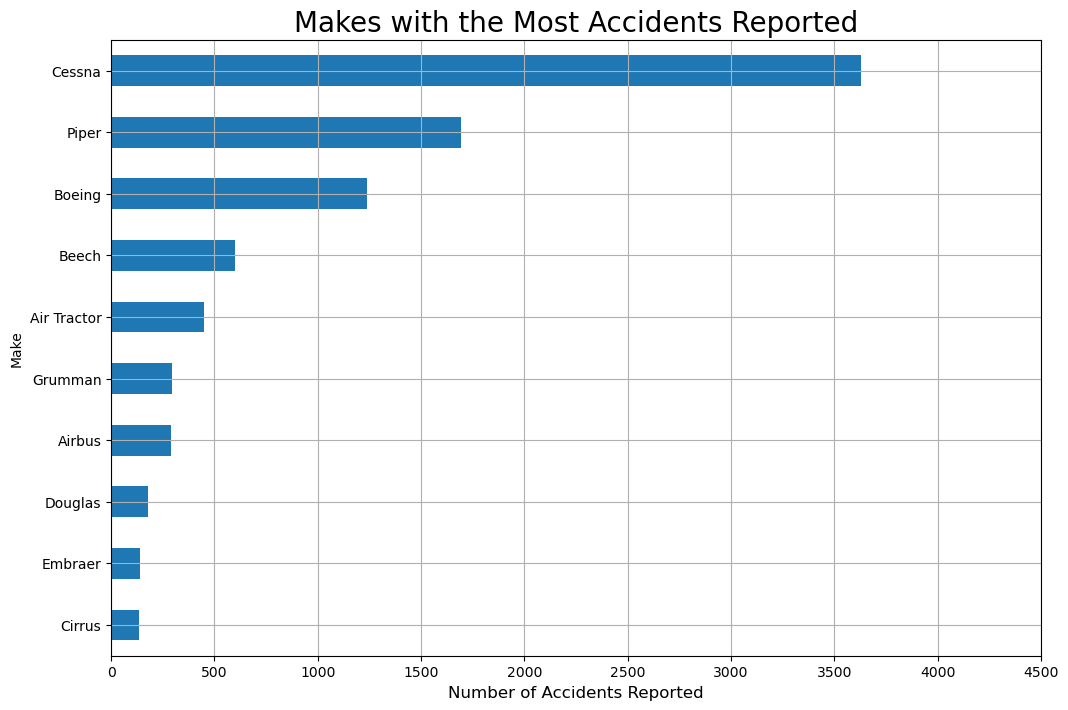

In [26]:
# plot top 10 makes with most reports
df_filtered['Make'].value_counts().head(10).sort_values().plot.barh(figsize=(12,8))
plt.title('Makes with the Most Accidents Reported', size=20)
plt.xlabel('Number of Accidents Reported', size=12)
plt.xlim(0,4500)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.grid()

## Aircraft Manufacturers: A Breakdown

Here's a breakdown of aircraft manufacturers based on the information you provided and Wikipedia: https://assetsamerica.com/aircraft-manufacturers/

**Commercial Aircraft:**

1. **Boeing (USA):** A leading manufacturer known for large commercial jets like the 737 and 787.
2. **Airbus (Netherlands):** Boeing's main competitor, known for the A320 and A350 families.
3. **Embraer (Brazil):** Focuses on smaller commercial jets for regional airlines. 
4. **Bombardier (Canada):** Another major player in regional jets and business jets.
5. **Comac (China):** A rising competitor developing new commercial aircraft models.
6. **Mitsubishi Aircraft Corp (MAC) (Japan):** Entering the commercial jet market with smaller models.

**Other Notable Commercial Manufacturers:**

* **United Aircraft Corp. (UAC) (Russia)**
* **Aviastar-SP (Russia)**
* **GippsAero (Australia):** Known for light aircraft

**Private Jets:**

* **Airbus Corporate Jets (France):** Business jet division of Airbus.
* **Boeing Business Jets (USA):** Business jet division of Boeing.
* **Bombardier Business Aircraft (BBA) (Canada):** Leading manufacturer of various business jet sizes.
* **Beechcraft (USA):** A major player in the "Big Three" of general aviation (alongside Cessna and Piper).
* **Cessna (USA):** Another member of the "Big Three", known for light and medium-sized private jets.
* **Dassault Aviation (France):** Renowned for high-performance business jets like the Falcon series.
* **Embraer (Brazil):** Also offers a range of business jets alongside commercial aircraft.

**General Aviation:**

* **Cessna, Beechcraft, Piper (USA):** The "Big Three" of general aviation, known for light aircraft like single-engine propeller planes.

**Other Aircraft Manufacturers:**

* **Mooney (USA):** Specializes in lightweight, personal airplanes.
* **Air Tractor (USA):** Focuses on agricultural aircraft.
* **Bellanca (Italy):** Produces a variety of general aviation aircraft.
* **Aviat (USA):** Manufactures single-engine sport and utility aircraft.

**Note:** This list is not exhaustive and focuses on some of the major players based on the provided information. 

Bellanca: (Italy)
Aviat: Sport and utility single engine (USA)

### Aircraft makes fatality investigation
    - look into the number of flights for each make that did or did not result in fatalities

### Aircraft makes - crashes without fatalities

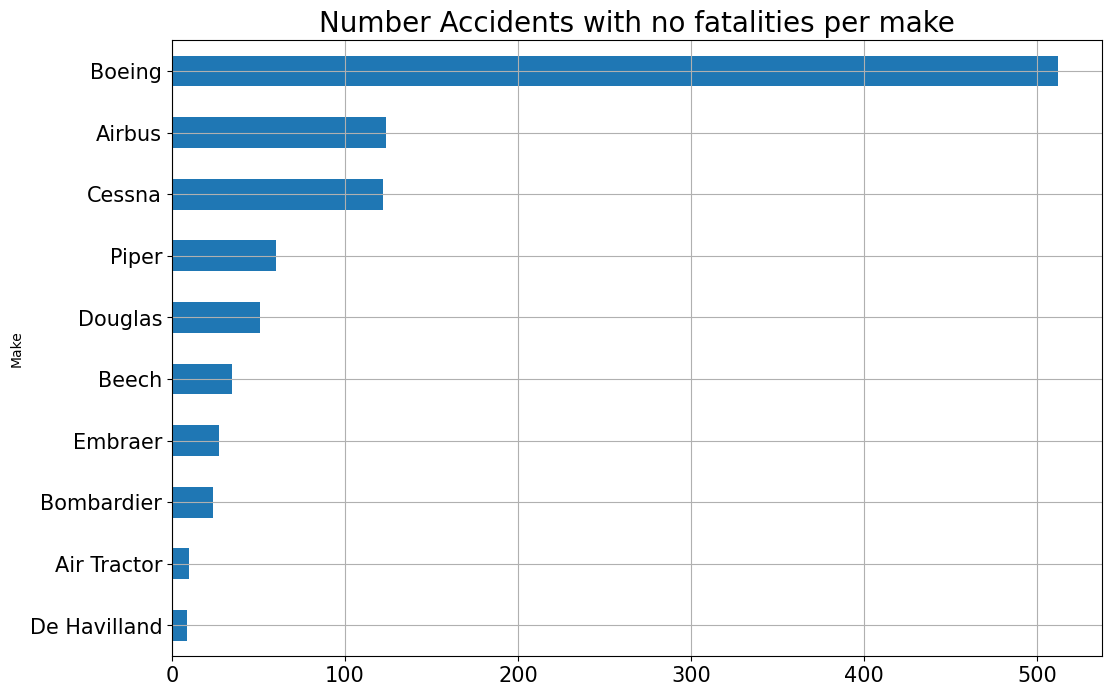

In [27]:
# get flight count with no fatalities
df_no_fatalities = df_filtered[df_filtered['Injury.Severity'] != 'Fatal']
no_fatalities_count = df_no_fatalities['Make'].value_counts()
no_fatalities_count.head(10).sort_values().plot.barh(figsize=(12,8))
plt.title('Number Accidents with no fatalities per make', size=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.grid()

# make sure all makes are included
for make in df_filtered['Make']:
    if make not in no_fatalities_count.index:
        no_fatalities_count[make] = 0

# make value count into a dataframe
data = {
    'Make': no_fatalities_count.index,
    'N.Non.Fatal.Crashes': no_fatalities_count
}
df_non_fatal_crash_count = pd.DataFrame(data)



Boeing and Airbus have the most accidents without fatalities

### Aircraft makes- crashes with fatalities

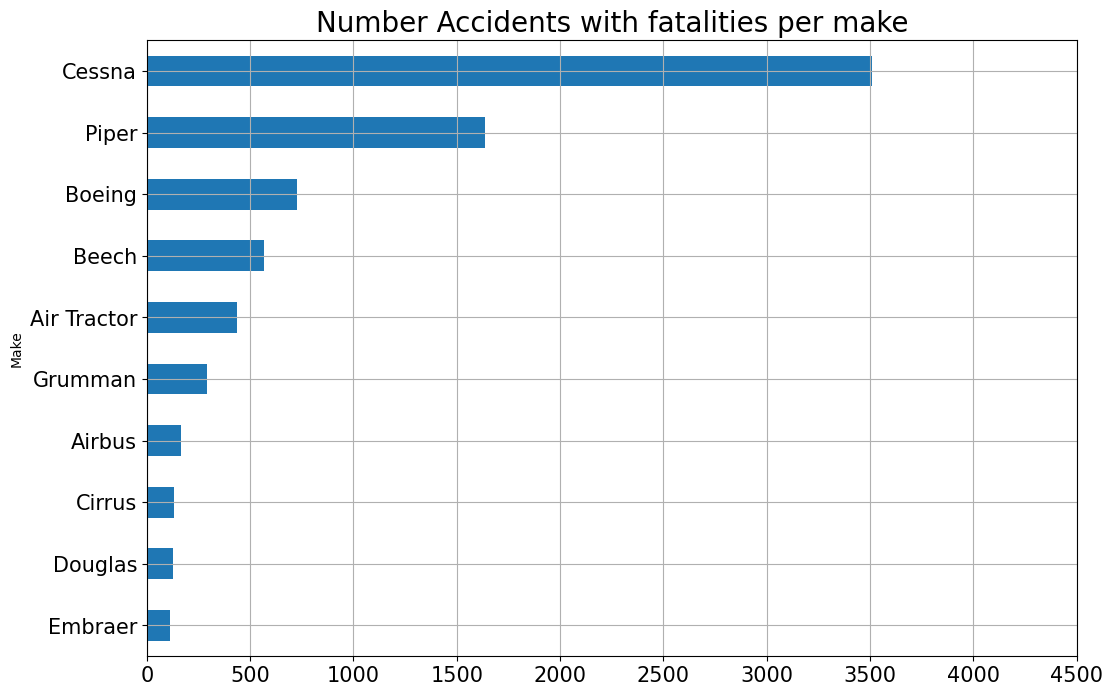

In [28]:
# get flight count with fatalities
df_fatalities = df_filtered[df_filtered['Injury.Severity'] == 'Fatal']
fatalities_count = df_fatalities['Make'].value_counts()
fatalities_count.head(10).sort_values().plot.barh(figsize=(12,8))

plt.title('Number Accidents with fatalities per make', size=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlim(0, 4500)
plt.grid()

# make sure all makes are included
for make in df_filtered['Make']:
    if make not in fatalities_count.index:
        fatalities_count[make] = 0

# make value count into a dataframe
data = {
    'Make': fatalities_count.index,
    'N.Fatal.Crashes': fatalities_count
}
df_fatal_crash_count = pd.DataFrame(data)


Cessna and Piper have the most crashes with fatalities

### data set of the count of fatal and non-fatal crashes per make

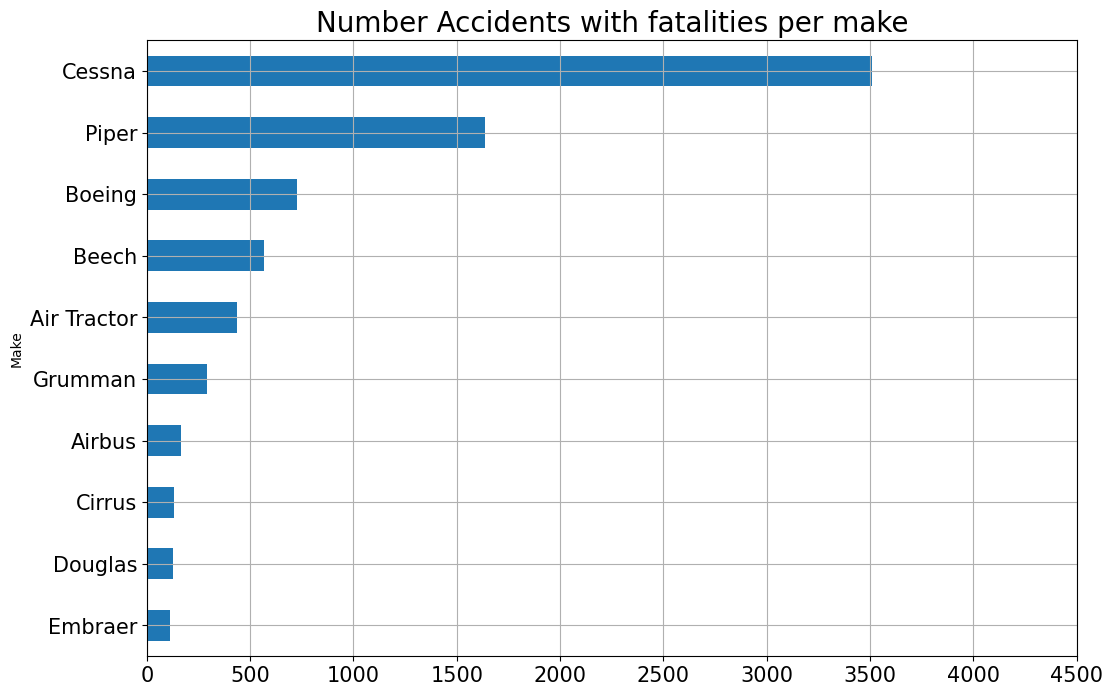

In [29]:
# get flight count with fatalities
df_fatalities = df_filtered[df_filtered['Injury.Severity'] == 'Fatal']
fatalities_count = df_fatalities['Make'].value_counts()
fatalities_count.head(10).sort_values().plot.barh(figsize=(12,8))

plt.title('Number Accidents with fatalities per make', size=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlim(0, 4500)
plt.grid()

# make sure all makes are included
for make in df_filtered['Make']:
    if make not in fatalities_count.index:
        fatalities_count[make] = 0

# make value count into a dataframe
data = {
    'Make': fatalities_count.index,
    'N.Fatal.Crashes': fatalities_count
}
df_fatal_crash_count = pd.DataFrame(data)

Cessna and Piper have the most crashes with fatalities

* detailed data set of the count of fatal and nont fatal crashes per make

In [30]:
# Drop 'Make' column if it exists before resetting the index
if 'Make' in df_fatal_crash_count.columns:
    df_fatal_crash_count = df_fatal_crash_count.drop(columns=['Make'])
if 'Make' in df_non_fatal_crash_count.columns:
    df_non_fatal_crash_count = df_non_fatal_crash_count.drop(columns=['Make'])

# Reset the index if 'Make' is part of the index
df_fatal_crash_count = df_fatal_crash_count.reset_index()
df_non_fatal_crash_count = df_non_fatal_crash_count.reset_index()

# Merge the DataFrames on 'Make'
df_fatal = df_fatal_crash_count.merge(df_non_fatal_crash_count, on='Make')

# Calculate total crashes and sort by this value
df_fatal['Total.Crashes'] = df_fatal['N.Fatal.Crashes'] + df_fatal['N.Non.Fatal.Crashes']
df_fatal = df_fatal.sort_values(by='Total.Crashes', ascending=False).reset_index(drop=True)

# Display the result
print(df_fatal.head())




          Make  N.Fatal.Crashes  N.Non.Fatal.Crashes  Total.Crashes
0       Cessna             3508                  122           3630
1        Piper             1635                   60           1695
2       Boeing              726                  512           1238
3        Beech              565                   35            600
4  Air Tractor              438                   10            448


Crash count is a deceiving metric for airplane safety. Imagine two manufacturers: Acme Airlines with 10 planes and Breezy Birds with 1000 planes. Even if Acme has a perfect record and Breezy Birds has a few minor accidents, statistically, Breezy Birds will have more crashes simply because they have more planes flying.

Therefore, to truly understand safety, we need to look at fatality rates. This takes into account the number of flights or plane-years in operation and compares it to the number of accidents with fatalities. This way, we can see which manufacturers have planes that are statistically safer, even if they have a large fleet.

 Fatality Ratio Calculations

In [31]:
# calculate the fatality ratio
df_fatal['ratio.fatal.to.tot'] = round(df_fatal['N.Fatal.Crashes'] / df_fatal['Total.Crashes'], 3)
df_fatal.head(10)

,Make,N.Fatal.Crashes,N.Non.Fatal.Crashes,Total.Crashes,ratio.fatal.to.tot
0,Cessna,3508,122,3630,0.966
1,Piper,1635,60,1695,0.965
2,Boeing,726,512,1238,0.586
3,Beech,565,35,600,0.942
4,Air Tractor,438,10,448,0.978
5,Grumman,292,4,296,0.986
6,Airbus,164,124,288,0.569
7,Douglas,128,51,179,0.715
8,Embraer,114,27,141,0.809
9,Cirrus,131,6,137,0.956


In [32]:
# Save Fatal DF to CSV
df_fatal.to_csv('data/fatal_make_data.csv')

### ratios of top 10 makes with the most accident reports

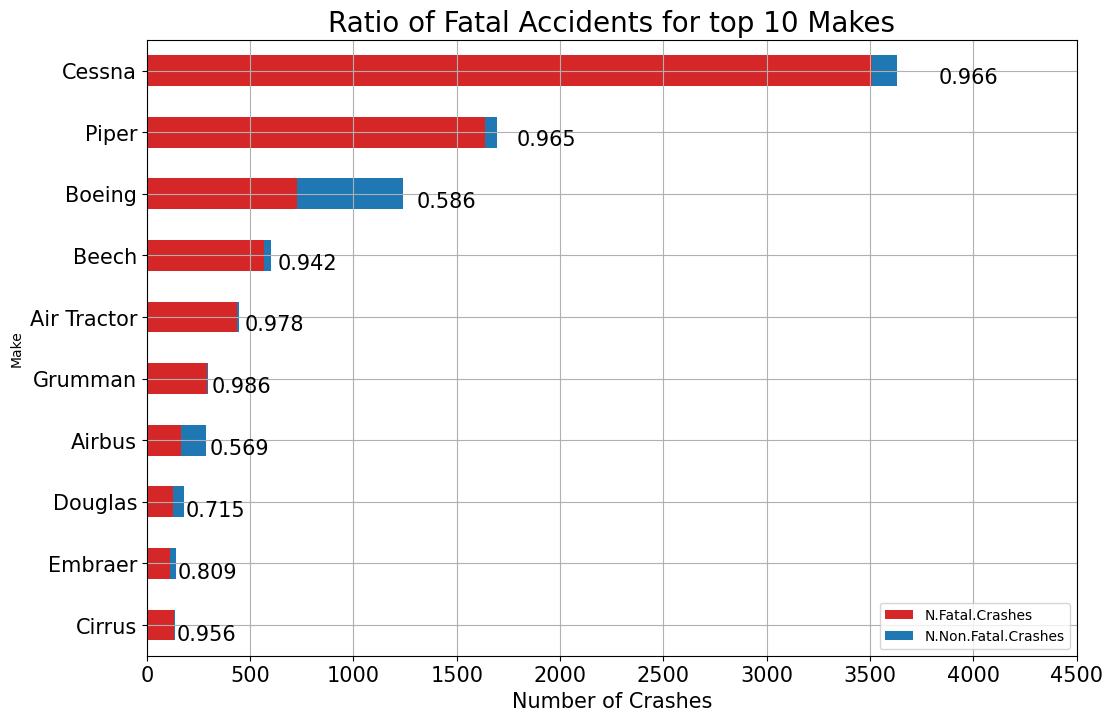

In [33]:
df_fatal_plot = df_fatal.head(10).sort_values(by='Total.Crashes').reset_index(drop=True)
ax = df_fatal_plot.plot(x='Make', y=['N.Fatal.Crashes', 'N.Non.Fatal.Crashes'], color=['tab:red', 'tab:blue'], kind="barh", stacked=True, figsize=(12,8))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.set_xlim(0, 4500)
ax.set_title('Ratio of Fatal Accidents for top 10 Makes', size=20)
ax.set_xlabel('Number of Crashes', size=15)
ax.legend()
ax.grid()

count = 0
for p in ax.patches:
    if p.xy[0] > 0:
        ax.annotate(df_fatal_plot['ratio.fatal.to.tot'][count], (df_fatal_plot['Total.Crashes'][count] * 1.055, p.get_y() * 1.005), size=15)
        count += 1

Boeing and Airbus have the lowest fatality ratio amongst the top 10 manufactures.

### makes with the lowest ratios

In [34]:
# exclude makes with less than 10 accidents reported - not enough data to get a good ratio. Also probalby not a very big company
df_ratio = df_fatal[df_fatal['Total.Crashes'] > 15]

In [35]:
# sort the ratios lowest to highest
df_ratio = df_ratio.sort_values(by='ratio.fatal.to.tot', ascending=True).reset_index(drop=True)

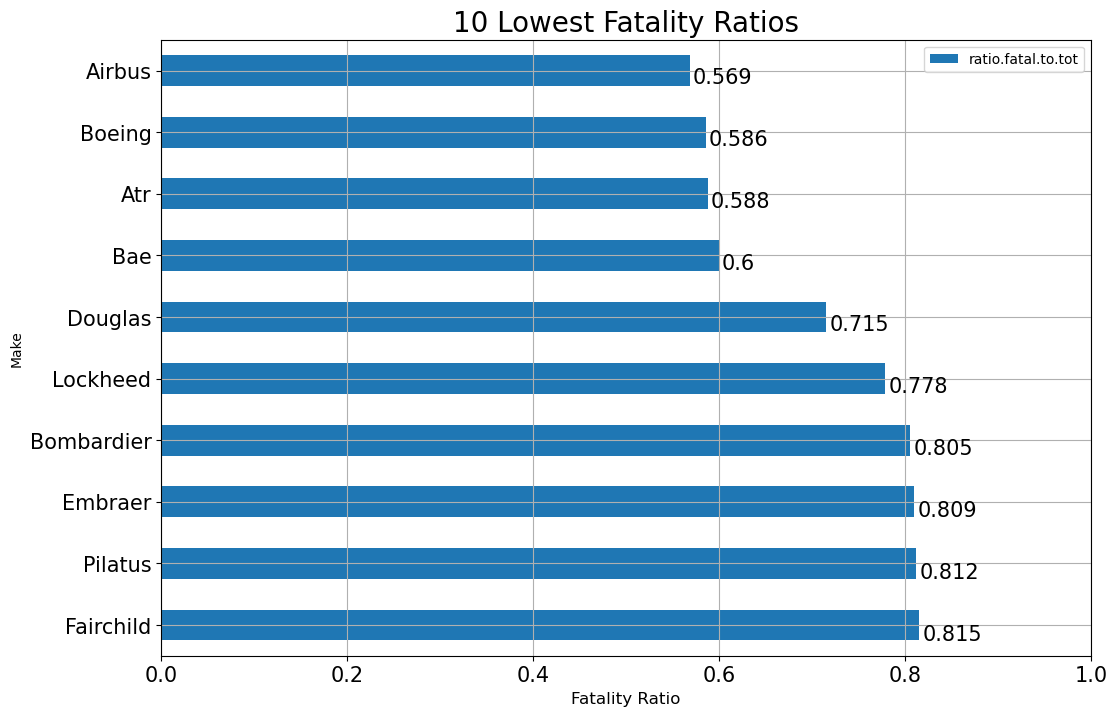

In [36]:
# plot
ax = df_ratio.head(10).sort_values(by='ratio.fatal.to.tot', ascending=False).plot('Make', 'ratio.fatal.to.tot', kind='barh', figsize=(12,8))
ax.set_title('10 Lowest Fatality Ratios', size=20)
ax.set_xlabel('Fatality Ratio', size=12)
ax.set_xlim(0,1)
ax.grid()

for p in ax.patches:
    ax.annotate(str(round(p.get_width(), 3)), (p.get_width() * 1.005, p.get_y() * 1.005), size=15)


Boeing and Airbus still maintain the lowest fatality ratio among all airplane manufactures. 

## fatal accidents per year over time

    1. top 10 makes with the most accident reports
    2. top 10 makes with the lowest fatality ratios

In [37]:
# create a new column with the year
df_filtered['Year'] = df_filtered['Event.Date'].map(lambda x: int(x[0:4]))

# create a new df to sort by date
df_year = df_filtered.sort_values(by='Year')[['Make', 'Model', 'Year', 'Event.Date', 'Injury.Severity', 'Aircraft.damage']]

# remove years prior to 2012
df_year = df_year[df_year['Year'] >= 2012]
df_fatal_year = df_year[df_year['Injury.Severity'] == 'Fatal']

# group by year and make
df_group_year = df_year.groupby(['Make', 'Year'])
df_fatal_year_group = df_fatal_year.groupby(['Make', 'Year'])

### number of fatal accidents per time for the top 10 makes with the most accident reports

Text(0.5, 0, 'Year')

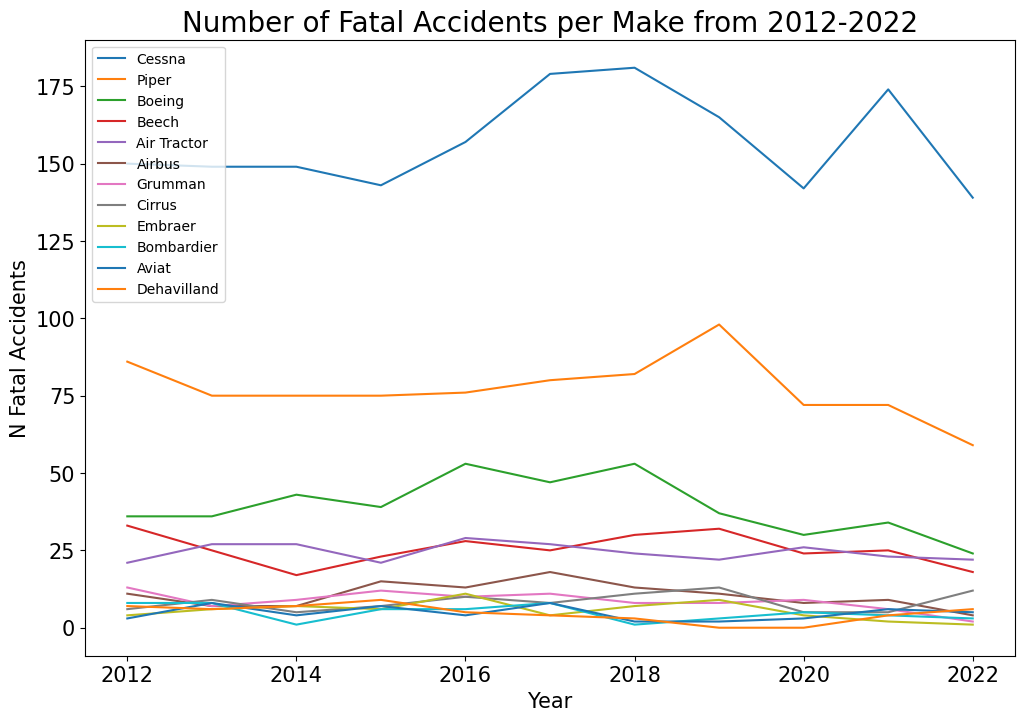

In [38]:
# plot n fatal accidents over time per make - makes with the most accient reports
years = sorted(list(df_year['Year'].value_counts().index))
makes = list(df_year['Make'].value_counts().index)
data = {}
fatal_data = {}

plt.figure(figsize=(12,8))
for make in makes:
    data[make] = []
    for year in years:
        try:
            group = df_fatal_year_group.get_group((make, year))
            n_accidents = len(group.value_counts())
            data[make].append(n_accidents)
        except KeyError:
            data[make].append(0)
    if sum(data[make]) >= 50:
        plt.plot(years, data[make], label=make)
plt.legend(loc='upper left')
plt.title('Number of Fatal Accidents per Make from 2012-2022', size=20)
plt.ylabel('N Fatal Accidents', size=15)
plt.xlabel('Year', size=15)

### number of fatal accidents per time for the top 10 makes with the lowest fatality ratios

Text(0.5, 0, 'Year')

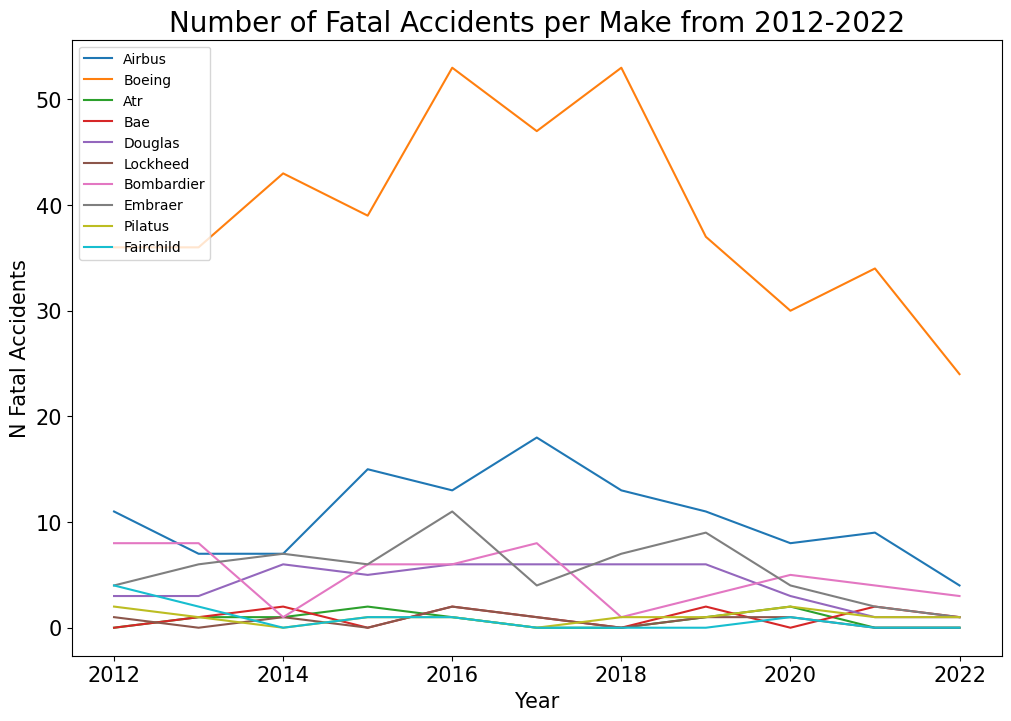

In [39]:
# plot n fatal accidents over time per make - 10 makes with the best ratios
years = sorted(list(df_year['Year'].value_counts().index))
makes = list(df_ratio.head(10)['Make'].value_counts().index)
data = {}
fatal_data = {}

plt.figure(figsize=(12,8))
for make in makes:
    data[make] = []
    for year in years:
        try:
            group = df_fatal_year_group.get_group((make, year))
            n_accidents = len(group.value_counts())
            data[make].append(n_accidents)
        except KeyError:
            data[make].append(0)
    if sum(data[make]) > 0:
        plt.plot(years, data[make], label=make)
plt.legend(loc='upper left')
plt.title('Number of Fatal Accidents per Make from 2012-2022', size=20)
plt.ylabel('N Fatal Accidents', size=15)
plt.xlabel('Year', size=15)

Boeing and Airbus show the most consistent improvement in number of fatal crashes over time over the last 10 years.

## between Boeing and Airbus which models have the lowest fatality ratios

### BOEING

In [40]:
import pandas as pd

def categorize_boeing_model(model):
  categories = {
      '707': '707', '717': '717', '727': '727', '737': '737',
      '747': '747', '744': '747',  # Combine 744 with 747 category
      '757': '757', '767': '767', '777': '777', '787': '787',
      '797': '797',  # Include potential future model 797
      'A75N1': 'A75N1', 'B75N1': 'A75N1',  # Combine similar model names
      'Md-8': 'MD-80', 'Md 8': 'MD-80'  # Include variations of MD-80
  }
  for category, model_prefix in categories.items():
    if model_prefix in model:
      return category
  return model  # Return original model if no match

df_boeing = df_filtered.groupby('Make').get_group('Boeing').reset_index()
df_boeing['Model'] = df_boeing['Model'].apply(categorize_boeing_model)

# Combine Make and Model into a single column
df_boeing['Make.and.Model'] = df_boeing['Make'] + ' ' + df_boeing['Model']

# Investigate the final list of Boeing models
df_boeing['Make.and.Model'].value_counts()


Make.and.Model
Boeing 737             628
Boeing 747             130
Boeing 777             129
Boeing 767             115
Boeing 757              89
Boeing 787              41
Boeing 727              29
Boeing 707              13
Boeing A75N1            13
Boeing 717               7
Boeing E75               5
Boeing A75               3
Boeing Md82              2
Boeing Md-82             2
Boeing B75N1             2
Boeing Pt-17             2
Boeing B17               2
Boeing Boeing Md-11      1
Boeing Ib75A             1
Boeing Md-88             1
Boeing Md                1
Boeing Md83              1
Boeing 300               1
Boeing Dhc-8-102         1
Boeing 400               1
Boeing Dc-9              1
Boeing B-17G             1
Boeing Md-90             1
Boeing Md-11             1
Boeing Dhc-8-311         1
Boeing Dc-10             1
Boeing B744              1
Boeing Md-11F            1
Boeing E75N1             1
Boeing Md-10-10F         1
Boeing B75-N1            1
Boeing A 75N1

In [41]:
# Save Boeing DF to a CSV
df_boeing.to_csv('data/boeing_data.csv')

### calculate ratios for all Boeing models - plot the top 10

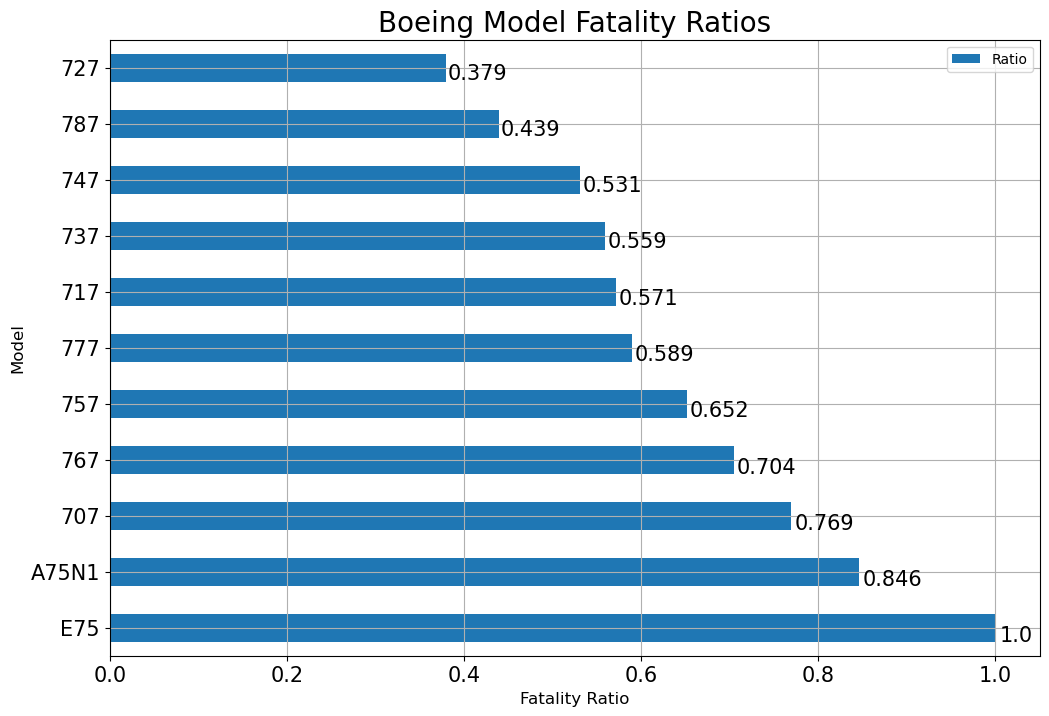

In [42]:
# get Boeing model fatality ratios
boeing_models = list(df_boeing['Model'].value_counts().index)
df_boeing_models = df_boeing.groupby('Model')
boeing_fatal_ratio = {
    'Model': [],
    'Ratio': []
}
for model in boeing_models:
    model_group = df_boeing_models.get_group(model).reset_index()
    n_tot_crashes = len(model_group)
    if n_tot_crashes > 3:
        n_fatal_crashes = len(model_group[model_group['Injury.Severity']=='Fatal'])
        ratio = n_fatal_crashes/n_tot_crashes
        boeing_fatal_ratio['Model'].append(model)
        boeing_fatal_ratio['Ratio'].append(ratio)
df_boeing_fatal_ratio = pd.DataFrame(boeing_fatal_ratio).sort_values(by="Ratio", ascending=False)
df_boeing_fatal_ratio = df_boeing_fatal_ratio.set_index('Model')

ax = df_boeing_fatal_ratio.plot(kind='barh', figsize=(12,8))
ax.set_title('Boeing Model Fatality Ratios', size=20)
ax.set_ylabel('Model', size=12)
ax.set_xlabel('Fatality Ratio', size=12)
ax.grid()

for p in ax.patches:
    plt.annotate(str(round(p.get_width(), 3)), (p.get_width() * 1.005, p.get_y() * 1.005), size=15)

Boeing Models with the lowest fatality ratios: Boeing 727 and Boeing 787

### AIRBUS

In [43]:
# hard code combine Boeing Models into like categories - (e.g. all A300 modesl together)

df_airbus = df_filtered.groupby('Make').get_group('Airbus').reset_index()

df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A300' if '300' in str(x) else x)
df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A310' if '310' in str(x) else x)
df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A319' if '319' in str(x) else x)
df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A320' if '320' in str(x) else x)
df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A321' if '321' in str(x) else x)
df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A330' if '330' in str(x) else x)
df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A340' if '340' in str(x) else x)
df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A380' if '380' in str(x) else x)

# reset the make and model column
df_airbus['Make.and.Model'] = df_airbus['Make'] + ' ' + df_airbus['Model']

# investigte the fnal list of Airbus models
df_airbus['Make.and.Model'].value_counts()

Make.and.Model
Airbus A320       121
Airbus A330        54
Airbus A319        40
Airbus A321        37
Airbus A300        20
Airbus A310         5
Airbus A380         5
Airbus A220         4
Airbus A340         1
Airbus F4-622R      1
Name: count, dtype: int64

In [44]:
# save Airbus DF to CSV
df_airbus.to_csv('data/airbus_data.csv')

### ratios for all Airbus models: plot the top 10

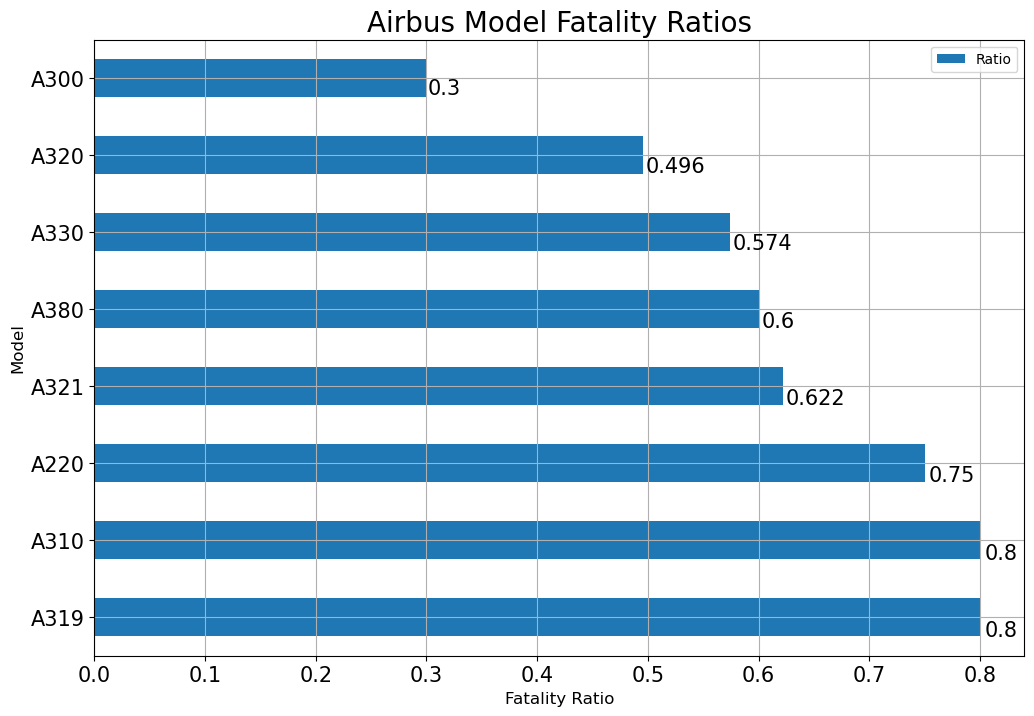

In [45]:
# get Airbus model fatality ratios
airbus_models = list(df_airbus['Model'].value_counts().index)
df_airbus_models = df_airbus.groupby('Model')
airbus_fatal_ratio = {
    'Model': [],
    'Ratio': []
}
for model in airbus_models:
    model_group = df_airbus_models.get_group(model).reset_index()
    n_tot_crashes = len(model_group)
    if n_tot_crashes > 3:
        n_fatal_crashes = len(model_group[model_group['Injury.Severity']=='Fatal'])
        ratio = n_fatal_crashes/n_tot_crashes
        airbus_fatal_ratio['Model'].append(model)
        airbus_fatal_ratio['Ratio'].append(ratio)
df_airbus_fatal_ratio = pd.DataFrame(airbus_fatal_ratio).sort_values(by="Ratio", ascending=False)
df_airbus_fatal_ratio = df_airbus_fatal_ratio.set_index('Model')

ax = df_airbus_fatal_ratio.plot(kind='barh', figsize=(12,8))
ax.set_title('Airbus Model Fatality Ratios', size=20)
ax.set_ylabel('Model', size=12)
ax.set_xlabel('Fatality Ratio', size=12)
ax.grid()

for p in ax.patches:
    plt.annotate(str(round(p.get_width(), 3)), (p.get_width() * 1.005, p.get_y() * 1.005), size=15)

## whichsize of plane that has the most fatal crashes

*Use the number of engines as a indicator of plane size*

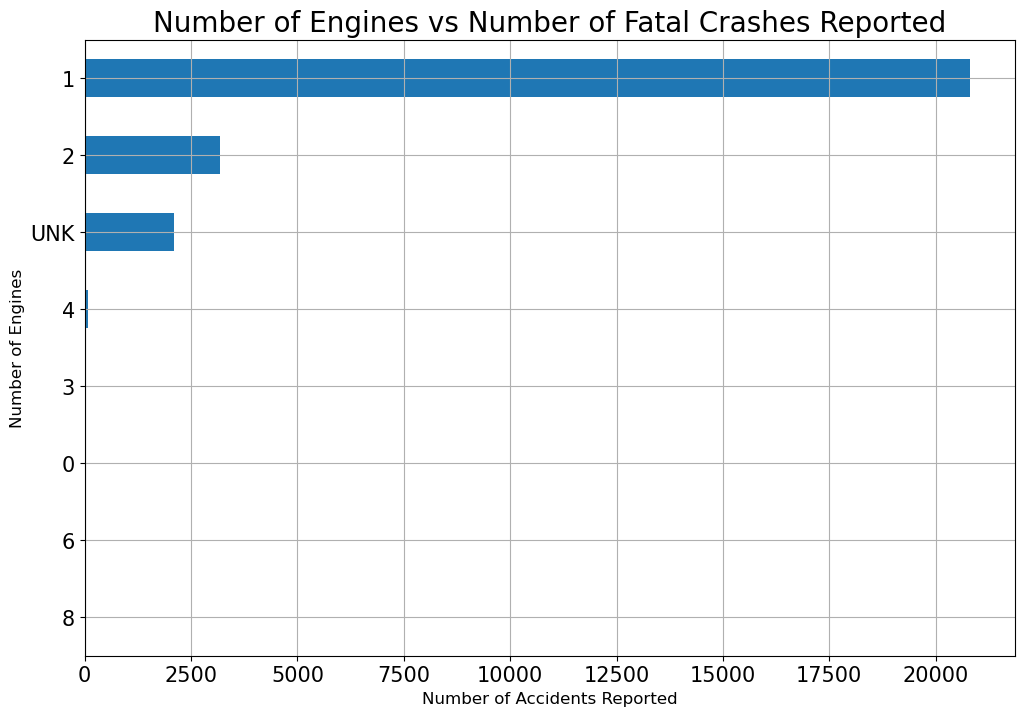

In [46]:
# plot the number of fatal crashes reported for each value in the number of engines column
df_fatal = df[df['Injury.Severity'] == 'Fatal']
df_fatal['Number.of.Engines'].value_counts().sort_values().plot.barh(figsize=(12,8))
plt.title('Number of Engines vs Number of Fatal Crashes Reported', size=20)
plt.xlabel('Number of Accidents Reported', size=12)
plt.ylabel('Number of Engines', size=12)
plt.grid()

Single engine planes result in the most fatal crashes. Best to avoid smaller planes